## Back to the assumptions

So we are finally at the point where we are able to fully understand the assumption that I made a long time ago, and for those that forgot it, let's throw it back up:

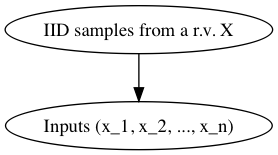

In [6]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('IID samples from a r.v. X')
G.add_node('Inputs (x_1, x_2, ..., x_n)')
G.add_edge('IID samples from a r.v. X', 'Inputs (x_1, x_2, ..., x_n)')
draw(G)

So I have two assumptions, first is that I can generate IID samples from a r.v. X, and the second is that I have those samples as my input. And it turns out that we can work with these for a while before we need more! But let's recap.

The first assumption says that there is some r.v. (a single one/identically distributed!) that we are sampling from. This means we have isolated where we get the data from, and we are very truthful about it.

In the Truman election they wanted to sample the single variable: americans, so that they could estimate who would win the election (because you see americans vote in the american election.

So they picked up their phone and called everyone that they could and they asked them who they were voting for. Do you see the problem? 

They weren't sampling americans, they were sampling americans with a phone! They were sampling the wrong population.

The first assumption also says that those samples should be independent. Meaning that their outcomes don't depend on each other. Thus if you gather the data in such a way, you will hit the first assumption.

The second assumption is easy: you have the data.

And with only this much we can get cracking. 

## Bootstrapping

Okay let's start off with the basics, what we are most interested in is the population distribution. For example: what is the height of all people in the world (imagine how much money it would take to collect all that data)! 

If we had that then we could answer nearly any question you could imagine about people's heights. But this is as I said above, often too hard or impossible to get. So the next best thing we can do is get summary statistics of the population (or at least our best guesses as to where they should be). 

One way to get this is with bootstrapping!

So let's get started

#### Estimators

So let's say we are looking for the median (or choose anything --  skewness for example) of the population distribution. How would we get that from the samples? Well let's go ahead and do the obvious choice: let's use the median of our samples, why not?

Below I will make a population distribution, sample it and then take the median:

In [7]:
import numpy as np

population_dist = np.random.poisson(size=1000)

sample = np.random.choice(population_dist, 10, False)

In [8]:
print np.median(population_dist)
print np.median(sample)

1.0
0.5


Well there you have it, this works pretty well. We can go home right? Not quite. Perhaps you might have noticed this (it is pretty subtle), but the median of a sample from a population is a r.v. In fact any statistic of a sample in a r.v.

Here, let me write it in a form that you would recognize:

In [9]:
def sample_median(population_dist):
    sample = np.random.choice(population_dist, 10, False)
    return np.median(sample)

Sure it is dependent on a pop distribution, but it is still a r.v. We can even look at the distribution of this r.v.:

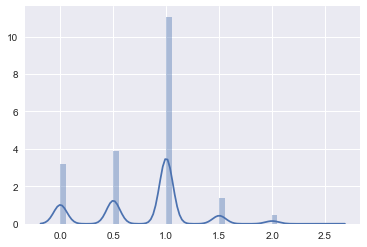

In [10]:
%matplotlib inline
import seaborn as sns

sns.distplot([sample_median(population_dist) for _ in range(10000)])

Looks kind of odd right? But this is an approximate (not infinite samples) distribution of a r.v.

So yes, we can just use the summary statistic of the sample as a best guess, but wouldn't it be awesome if we could know what this distribution of the summary statistic instead! That way we could say:

<blockquote>
Well the median is very likely to be 1, but there is a chance that is is 0 or .5 as well, so don't bet all your money on it being 1
</blockquote>

So again, we are stuck in this odd position, wouldn't it be nice if we knew more...

Well in fact we do!

#### Sampling from the sample

Let me first say that this is not a proof. If you are looking for a proof for the above, then this is not the course for you, that being said, the below should give you some intuition.

Well we know that X is a r.v. Do you remember what we used to approximate X's distribution? We used samples! And guess what we have in our assumptions... Samples! So we can use the samples to simulate the population distribution and take samples from the sample. 

Wow right. One thing to be careful of is that we will be taking samples with replacement. So let's go ahead and do that below and check out the resulting distribution:

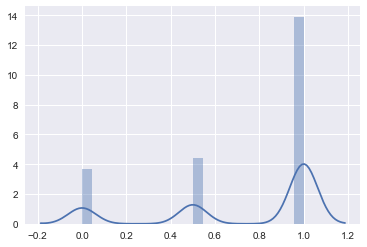

In [11]:
sample = np.random.choice(population_dist, 10, False)

def sample_median_with_replacement(approximate_population_dist):
    sample = np.random.choice(approximate_population_dist, 10, True)
    return np.median(sample)

sns.distplot([sample_median_with_replacement(sample) for _ in range(10000)])

Close right? It's best if you can take N to the N power of sample samples where N is your number of samples, but 10k is always a good number. 

So again this is an approximation of an approximation. If we increase 10k to be infinity we will be getting the true distribution to the approximation of the sampling distribution of the median. If we increase 10 to be infinity we will be getting an approximation of the true sampling distribution of the median. 

To test this out, let's increase the sample size. Below is the approximate of the true sampling distribution:

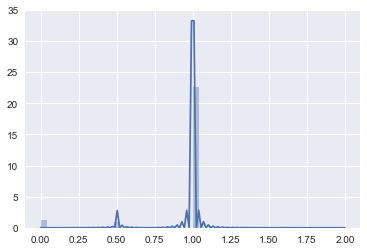

In [14]:
def sample_median(population_dist):
    sample = np.random.choice(population_dist, 50, False)
    return np.median(sample)

sns.distplot([sample_median(population_dist) for _ in range(10000)])

And below here is the approximate to the approximate sampling distribution:

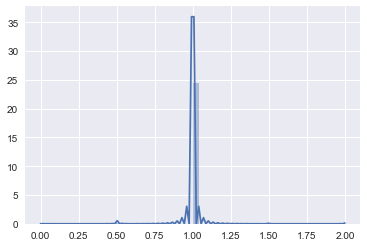

In [15]:
sample = np.random.choice(population_dist, 50, False)

def sample_median_with_replacement(approximate_population_dist):
    sample = np.random.choice(approximate_population_dist, 50, True)
    return np.median(sample)

sns.distplot([sample_median_with_replacement(sample) for _ in range(10000)])

Starting to look pretty close right?

## Why this matters

We will cover the big reasons why this matters next class, but you should be able to understand having a distribution (approximate) of a summary statistic of a population is incredibly valuable!

We can easily say: it's likely that the standard deviation of the height of the population of people is XYZ.